**2) Demonstrate various data pre-processing (EDA) techniques for a given dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Display basic information about the dataset
print("Basic Information:")
print(iris.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(iris.describe())


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(iris.head())


First Few Rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(iris.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


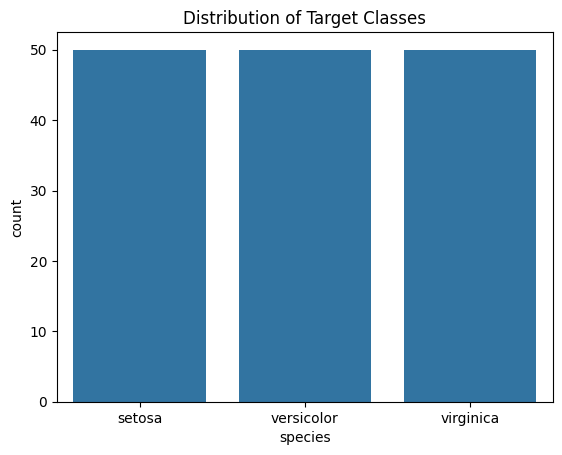

In [ ]:
# Visualize the distribution of target classes
sns.countplot(x='species', data=iris)
plt.title('Distribution of Target Classes')
plt.show()

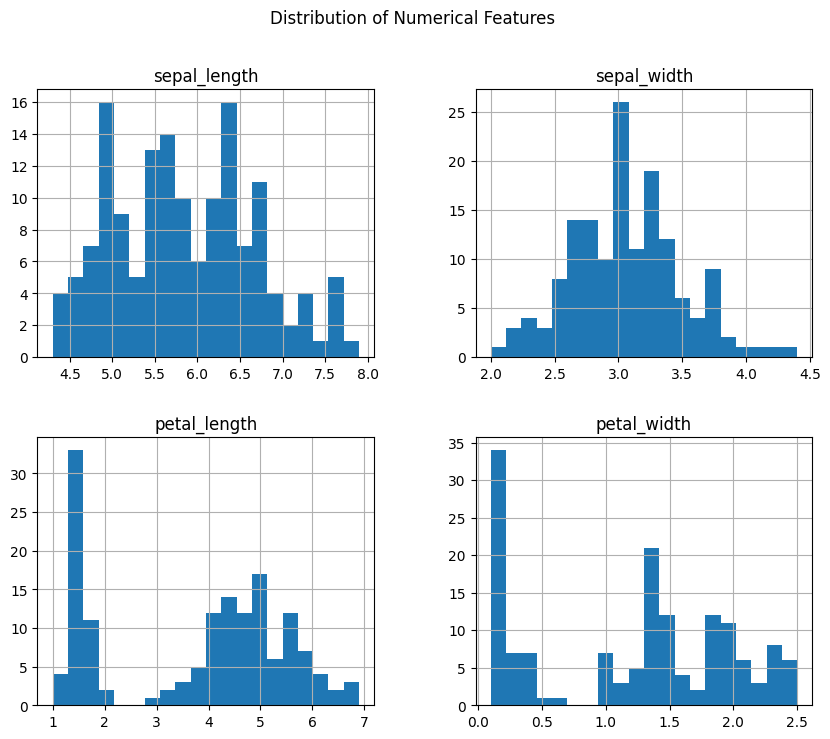

In [ ]:
# Visualize the distribution of numerical features
iris_numerical = iris.drop('species', axis=1)
iris_numerical.hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

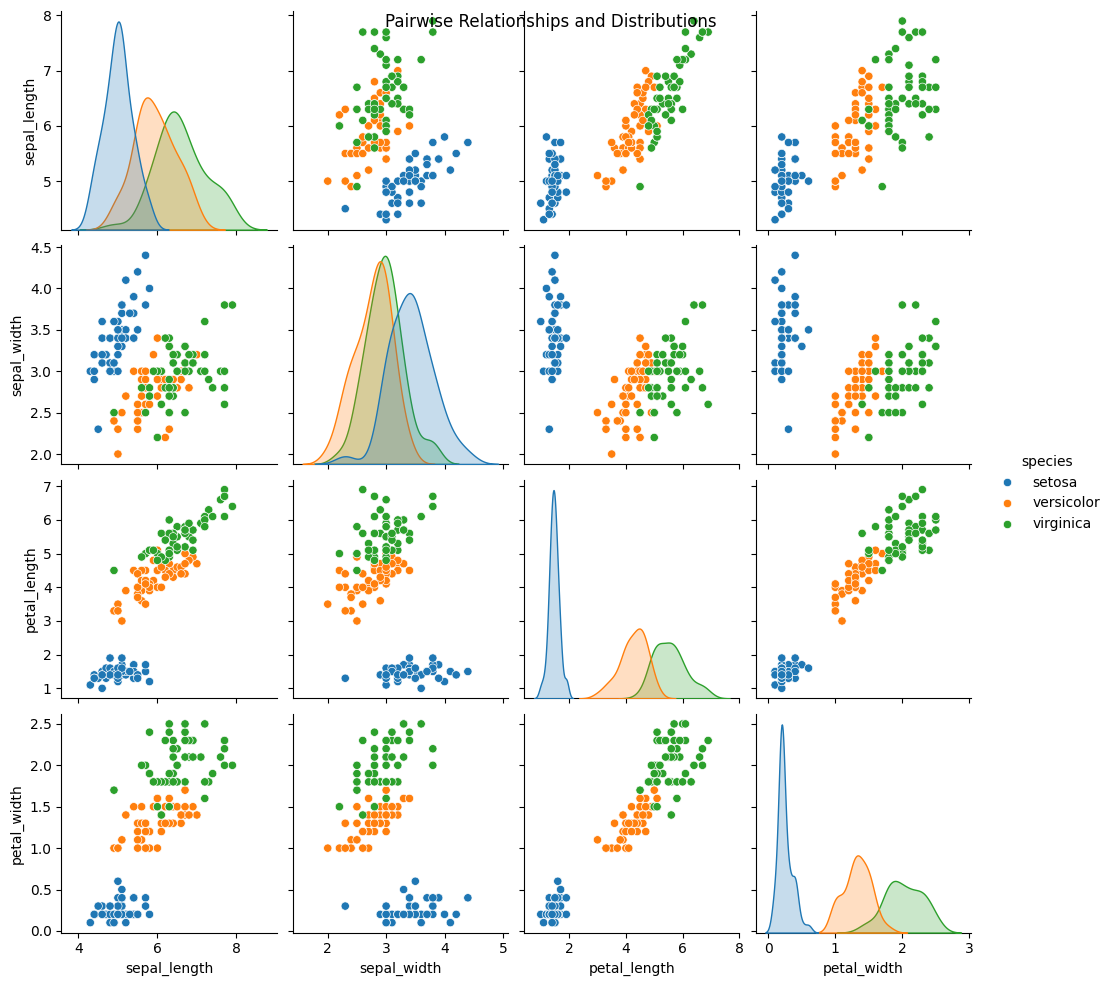

In [ ]:
# Pairplot for pairwise relationships and distributions
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships and Distributions')
plt.show()

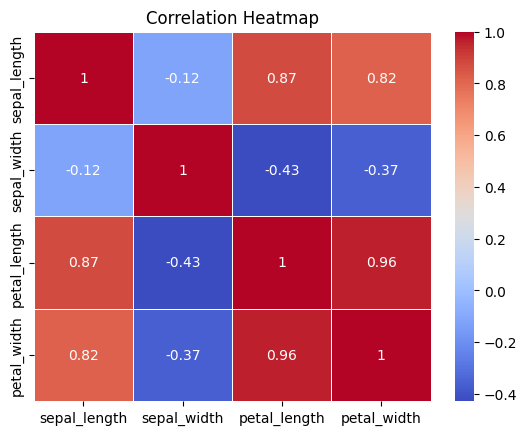

In [ ]:
# Correlation heatmap for numerical features
correlation_matrix = iris_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

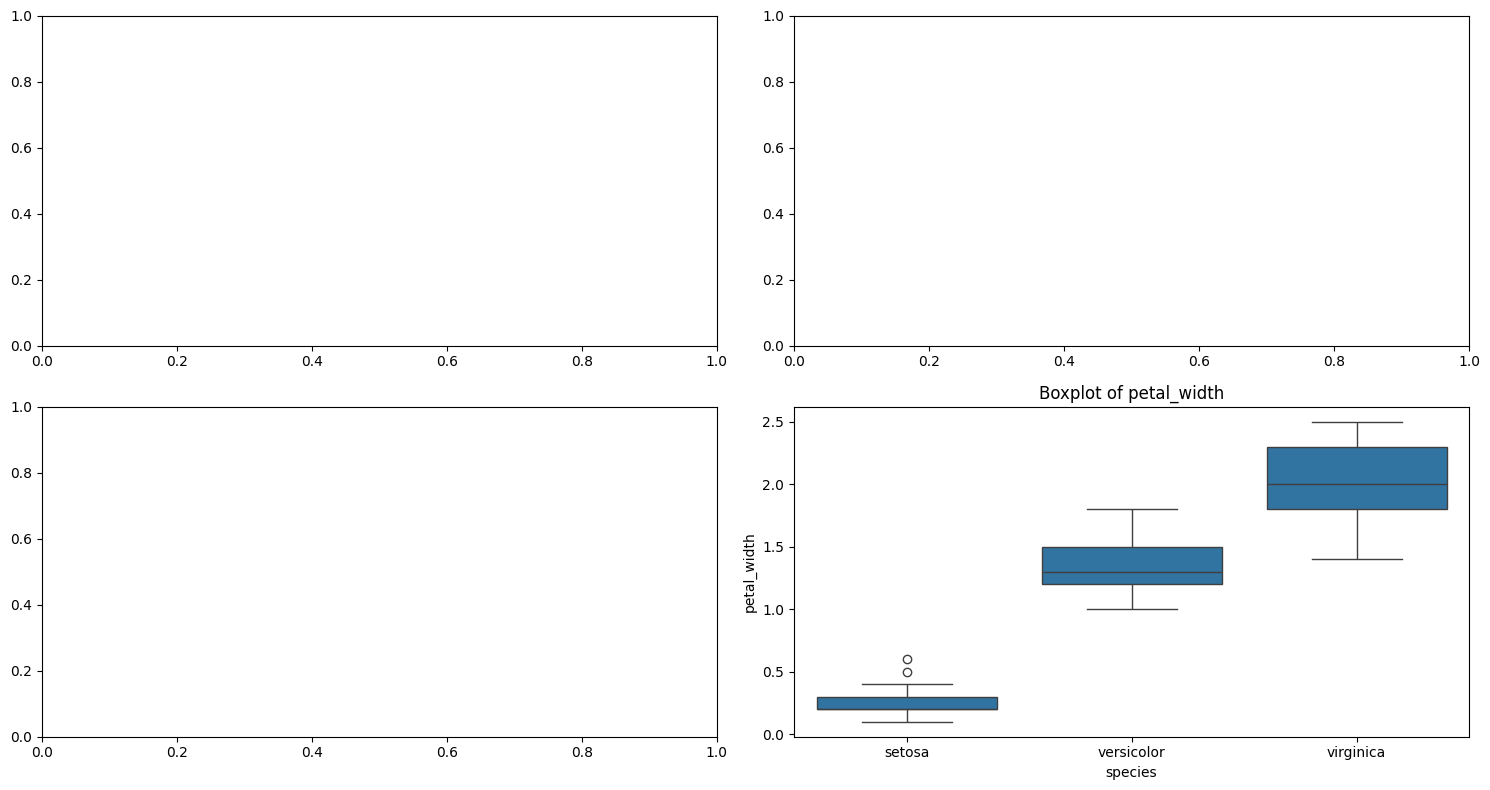

In [ ]:
# Boxplot for individual features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(iris_numerical.columns):
  plt.subplot(2, 2, i+1)
sns.boxplot(x='species', y=feature, data=iris)
plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Outlier detection and removal
def remove_outliers(df, features):
    df_out = df.copy()
    for feature in features:
        Q1 = df_out[feature].quantile(0.25)
        Q3 = df_out[feature].quantile(0.75)
        IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df_out[(df_out[feature] >= lower_bound) & (df_out[feature] <= upper_bound)]
    return df_out

outlier_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_no_outliers = remove_outliers(iris, outlier_features)

In [ ]:
# Display the shape after outlier removal
print(f"\nShape after outlier removal: {iris_no_outliers.shape}")


Shape after outlier removal: (150, 5)


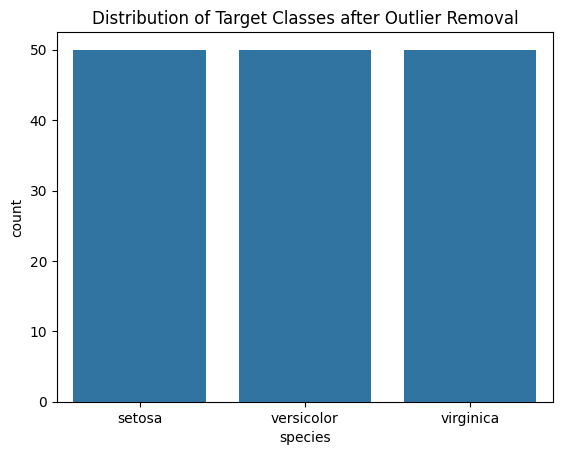

In [ ]:
# Visualize the distribution of target classes after outlier removal
sns.countplot(x='species', data=iris_no_outliers)
plt.title('Distribution of Target Classes after Outlier Removal')
plt.show()

3) Write a python program to demonstrate various data visualization Techniques

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


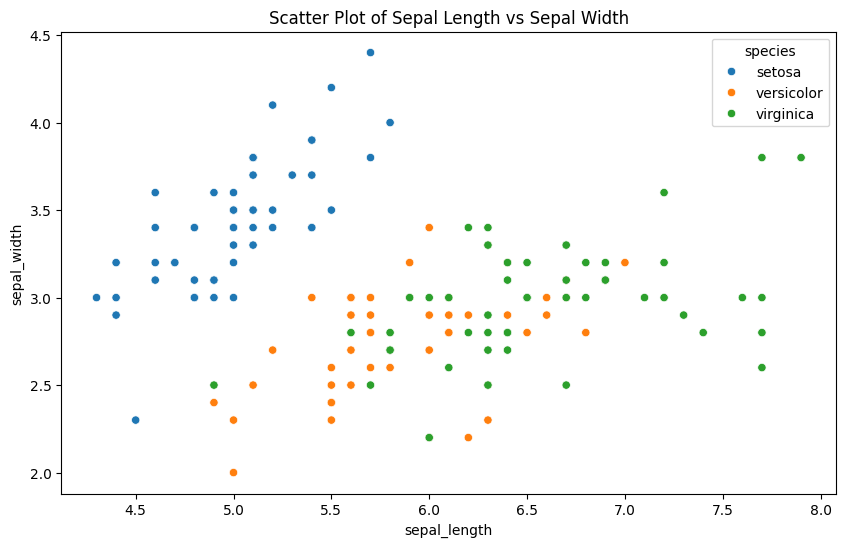

In [ ]:
# Scatter plot with different colors for each species
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

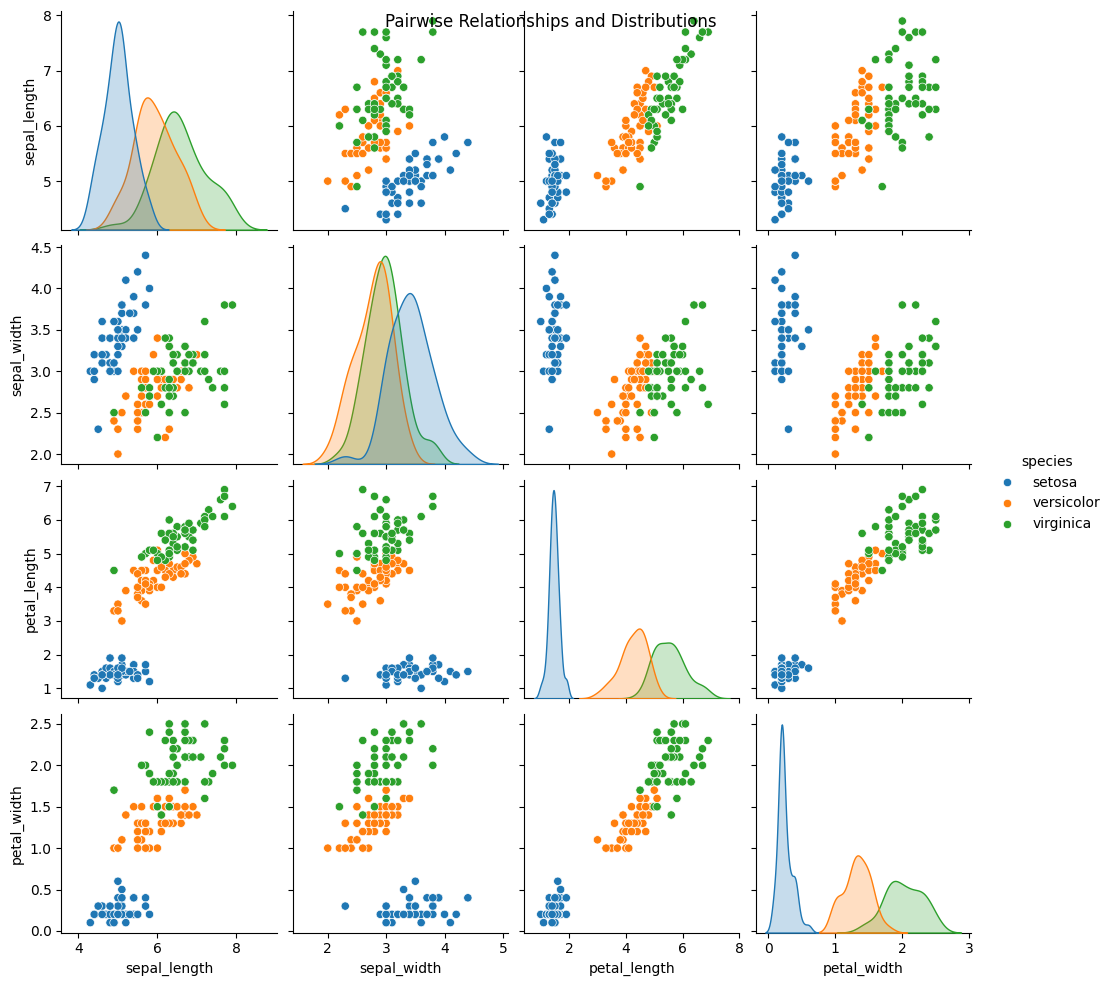

In [ ]:
# Pair plot for pairwise relationships and distributions
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships and Distributions')
plt.show()

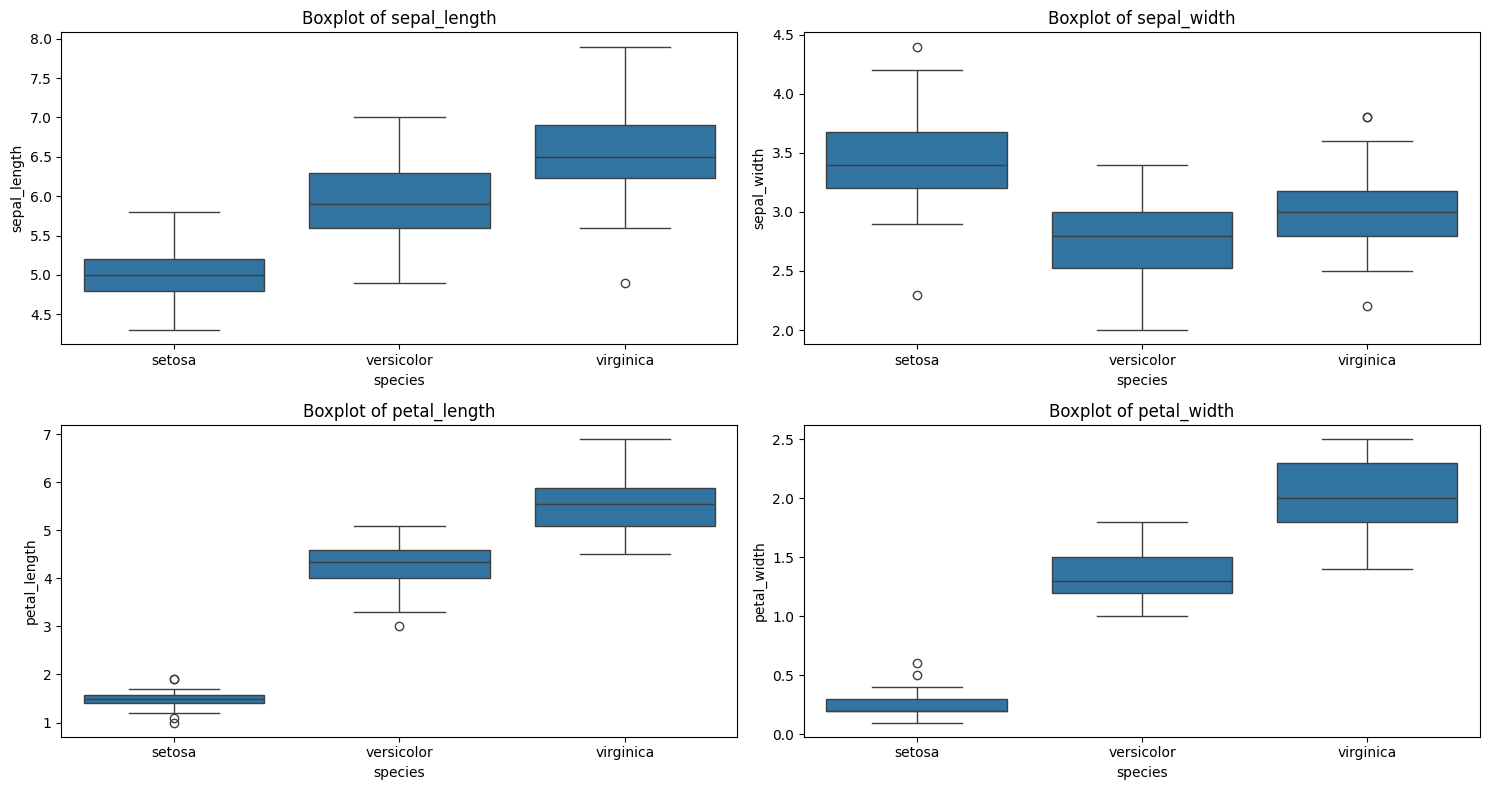

In [ ]:
# Boxplot for individual features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


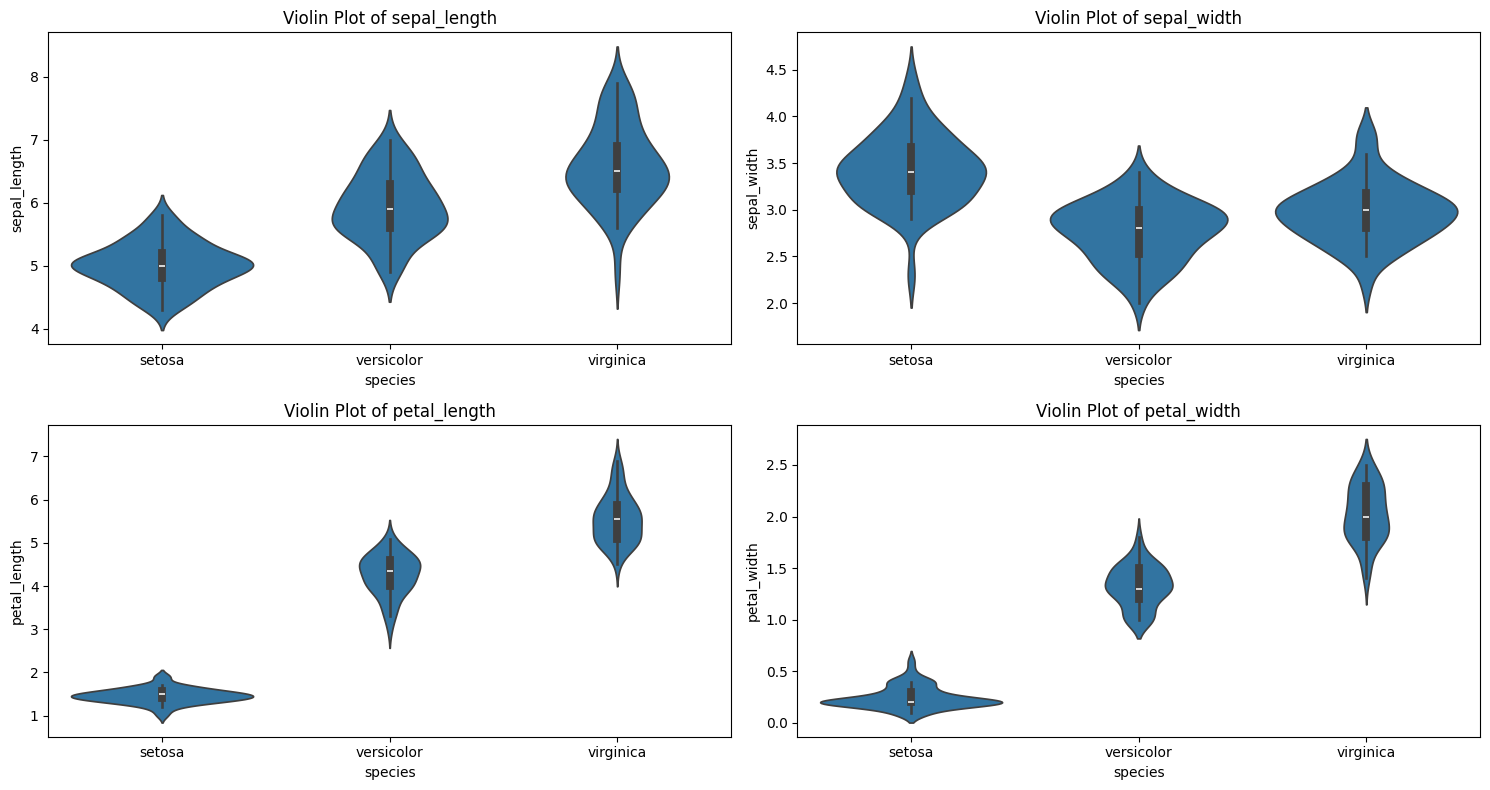

In [ ]:
# Violin plot for individual features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=iris)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


<ipython-input-10-824313fee78f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


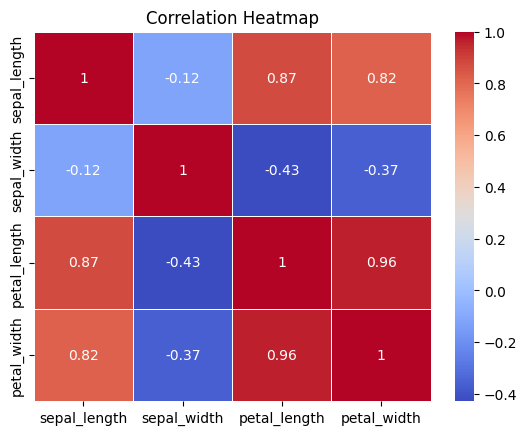

In [ ]:
# Correlation heatmap for numerical features
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

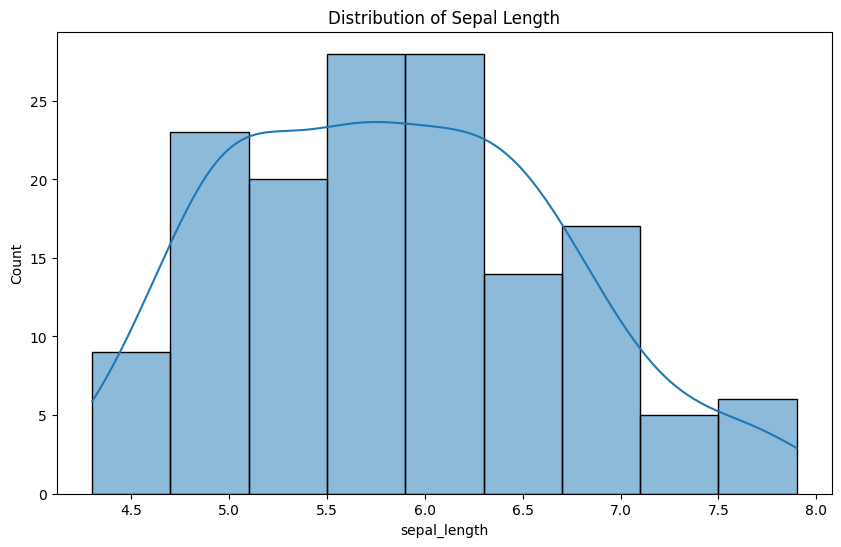

In [ ]:
# Distribution of a single variable with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(iris['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.show()

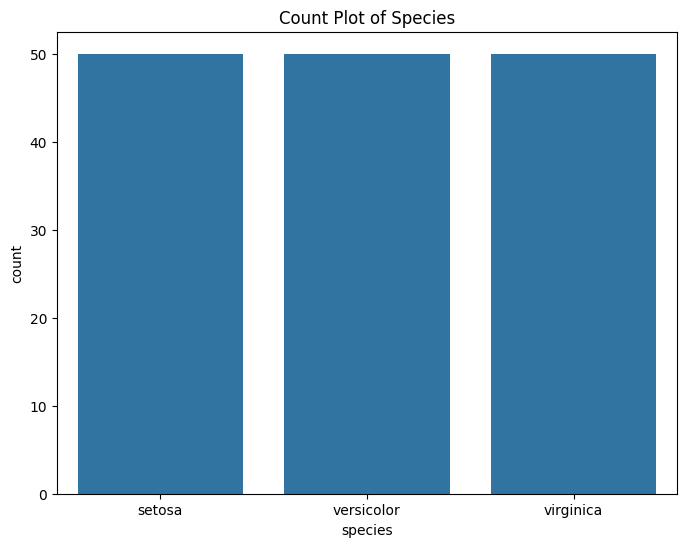

In [ ]:
# Count plot for categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris)
plt.title('Count Plot of Species')
plt.show()

**4) Develop decision tree classification model for a given dataset and use it to classify a new sample?**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset

iris_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Now, let's use the trained model to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
predicted_class = clf.predict(new_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("\nPredicted Class for the New Sample:", predicted_class[0])


Predicted Class for the New Sample: 0


**5) Implement simple and multiple Linear regression models**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Generate a sample dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
# Create a DataFrame from the generated data
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

In [ ]:
# Simple Linear Regression
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions on the test set
y_pred_simple = simple_reg.predict(X_test)

In [ ]:
# Evaluate the Simple Linear Regression model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [ ]:
print("Simple Linear Regression:")
print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

Simple Linear Regression:
Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


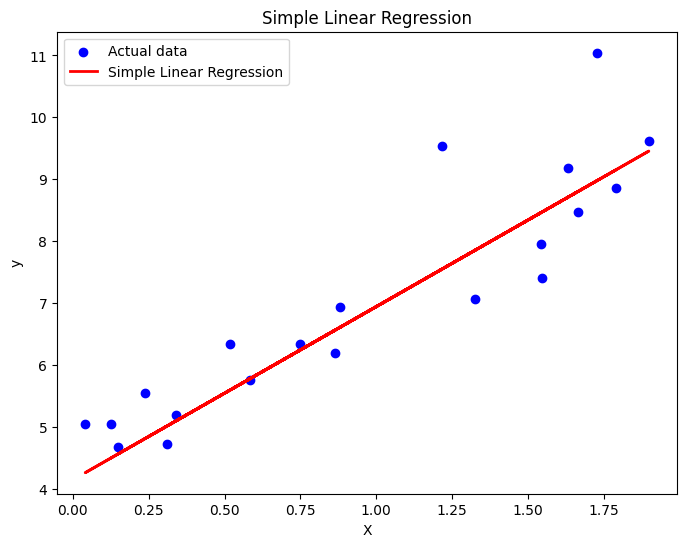

In [ ]:
# Plot the Simple Linear Regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Simple Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Multiple Linear Regression
# Generate additional features for the multiple regression example
data['X2'] = 3 * np.random.rand(100, 1)
X_multiple = data[['X', 'X2']]

In [ ]:
# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, data['y'], test_size=0.2, random_state=42)

In [ ]:
# Multiple Linear Regression
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi)

LinearRegression()

In [ ]:
# Predictions on the test set
y_pred_multi = multi_reg.predict(X_test_multi)

In [ ]:
# Evaluate the Multiple Linear Regression model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression:")
print("Mean Squared Error:", mse_multi)
print("R-squared:", r2_multi)


Multiple Linear Regression:
Mean Squared Error: 0.6358071396044593
R-squared: 0.8124829187836662


**6) Develop Logistic Regression Model for a given dataset?**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

In [ ]:
# Consider a binary classification problem (0 or 1)
iris_df['binary_target'] = (iris_df['target'] == 0).astype(int)

# Split the dataset into features (X) and binary target variable (y)
X = iris_df.drop(['target', 'binary_target'], axis=1)
y = iris_df['binary_target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[20  0]
 [ 0 10]]


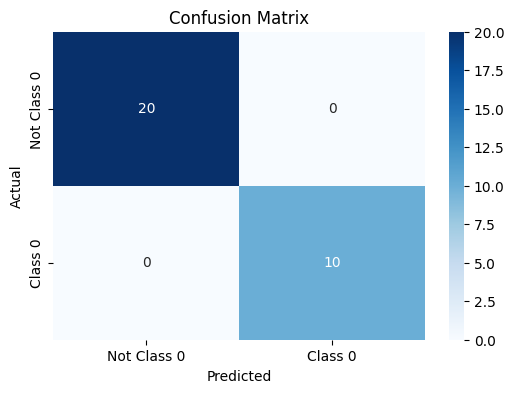

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Class 0', 'Class 0'], yticklabels=['Not Class 0', 'Class 0'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**7) Implement Naive bayes theorem to classify the text data?**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Sample text data
data = {'text': ["I love programming", "Machine learning is fascinating", "Spam emails are annoying", "Python is a great language", "Buy our new product now"]}
labels = [1, 1, 0, 1, 0]  # 1 for positive, 0 for negative

In [ ]:
data

{'text': ['I love programming',
  'Machine learning is fascinating',
  'Spam emails are annoying',
  'Python is a great language',
  'Buy our new product now']}

In [ ]:
labels

[1, 1, 0, 1, 0]

In [ ]:
# Create a DataFrame
df = pd.DataFrame({'text': data['text'], 'label': labels})

In [ ]:
df

,text,label
0,I love programming,1
1,Machine learning is fascinating,1
2,Spam emails are annoying,0
3,Python is a great language,1
4,Buy our new product now,0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Initialize the Naive Bayes model (Multinomial Naive Bayes for text data)
naive_bayes = MultinomialNB()

In [ ]:
# Train the model
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test_vectorized)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
 [[1]]


**8) Implement K-nearest neighbours classification using python**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**9) Write a python program to implement K-Means clustering Algorithm**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
# Create a synthetic dataset
data, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)

In [ ]:
# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

In [ ]:
df

,Feature1,Feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437
...,...,...
295,-3.660191,9.389984
296,3.810884,1.412989
297,-4.116681,9.198920
298,-8.819909,8.999960


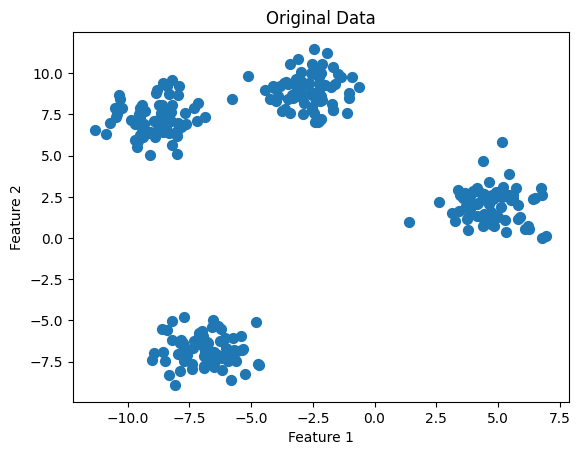

In [ ]:
# Visualize the original data
plt.scatter(df['Feature1'], df['Feature2'], s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)

In [ ]:
# Fit the model to the data
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Get the cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

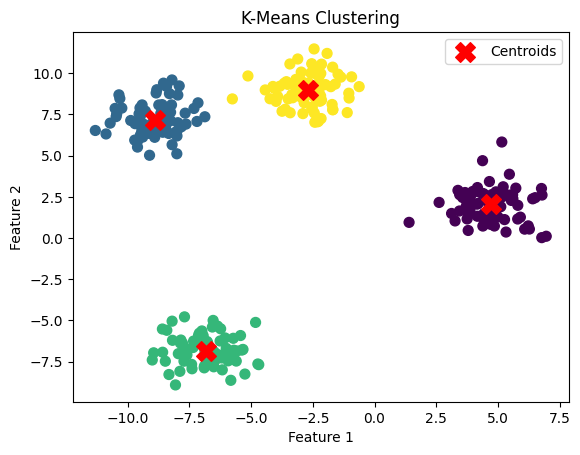

In [ ]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clustered data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**10) Implement Dimensionality raduction using principle component Analysis (PCA) method**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
# Convert the data to a DataFrame
df = pd.DataFrame(X, columns=iris_data.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
# Initialize PCA with the number of components to retain
n_components = 2  # Set the desired number of components
pca = PCA(n_components=n_components)

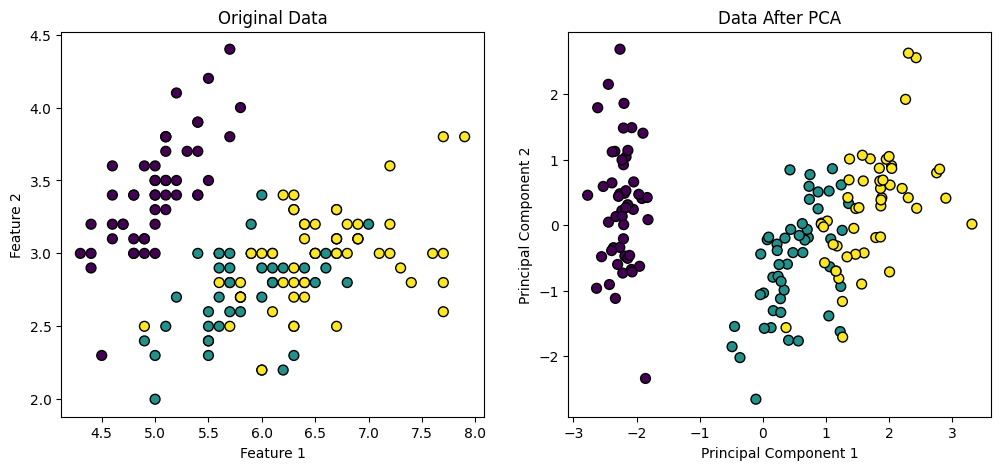

In [ ]:
# Fit and transform the data
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame from the PCA-transformed data
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['Target'] = y

# Visualize the data before and after PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before PCA
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# After PCA
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
ax2.set_title('Data After PCA')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.show()


**11) Build Artificial Neural Network model with back propagation on a given dataset**

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(1000, 5)
y = (X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3] + np.random.randn(1000) * 0.1) > 2.5
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set:", accuracy)



Epoch 1/10
20/20 [==============================] - 3s 34ms/step - loss: 0.7353 - accuracy: 0.4469 - val_loss: 0.6854 - val_accuracy: 0.5562
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 0.6149 - accuracy: 0.7047 - val_loss: 0.5635 - val_accuracy: 0.7937
Epoch 3/10
20/20 [==============================] - 0s 16ms/step - loss: 0.5254 - accuracy: 0.8188 - val_loss: 0.4742 - val_accuracy: 0.8438
Epoch 4/10
20/20 [==============================] - 0s 12ms/step - loss: 0.4579 - accuracy: 0.8297 - val_loss: 0.4029 - val_accuracy: 0.8687
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.8469 - val_loss: 0.3480 - val_accuracy: 0.8750
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 0.3581 - accuracy: 0.8766 - val_loss: 0.3028 - val_accuracy: 0.8938
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.3214 - accuracy: 0.8922 - val_loss: 0.2665 - val_accuracy: 0.9312
Epoch 8/10
20/

**12) Implement Random forest ensemble method on a given dataset.**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**13) Implement Boosting ensemble method on a given dataset**

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the AdaBoost classifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
